In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

df = pd.read_csv('C:/Everything/Data/Real-Data/real_Combine.csv')
x = df.iloc[:,:-1] #independent varible
y = df.iloc[:,-1] #dependent varible

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
2,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
3,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
4,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500


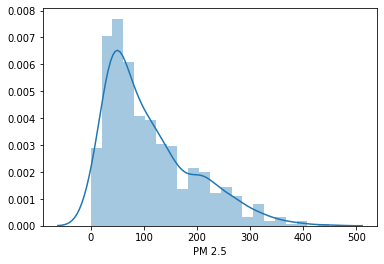

In [2]:
sns.distplot(y)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors=5)

In [4]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [5]:
print("Coefficient of determination R^2 on train set: {}".format(knn_regressor.score(X_train,y_train)))
print("Coefficient of determinatiopn R^2 on test set: {}".format(knn_regressor.score(X_test,y_test)))

Coefficient of determination R^2 on train set: 0.7474257512488999
Coefficient of determinatiopn R^2 on test set: 0.5865184293994168


In [6]:
score = cross_val_score(knn_regressor,x,y,cv=5)
score.mean()

0.29064464060110856

In [7]:
knn_pred = knn_regressor.predict(X_test)

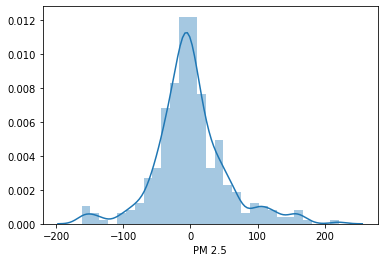

In [8]:
sns.distplot(y_test-knn_pred)

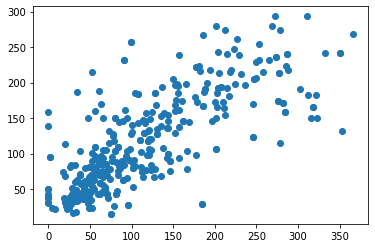

In [9]:
plt.scatter(y_test,knn_pred)

##### Hyperparameter tuning 

In [10]:
accuracy_rate = []

for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=5)
    score=cross_val_score(knn,x,y,cv=5,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

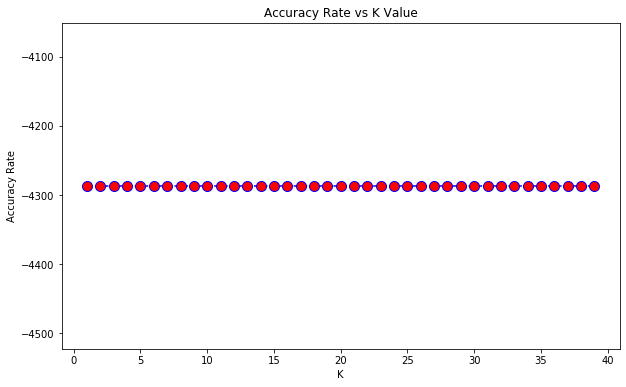

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

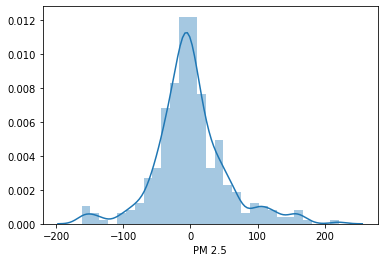

In [12]:
sns.distplot(y_test-knn_pred)

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, knn_pred))
print('MSE:', metrics.mean_squared_error(y_test, knn_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

MAE: 37.48469572945722
MSE: 2903.214604120082
RMSE: 53.88148665469506


In [14]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(knn_regressor, file)